In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
file_name="Resources/clean_2019.csv"
clean_2019=pd.read_csv(file_name)
# clean_2019.drop("Unnamed:0")
clean_2019.tail()

# They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

,Unnamed: 0,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [29]:
clean_2019.drop(["Unnamed: 0"], axis=1)

,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [30]:
clean_2019.describe()

,Unnamed: 0,overall_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,77.500000,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.750000,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,77.500000,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,116.250000,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,155.000000,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [33]:
# above 5.4 = happy(1), below 5.4 = not happy(0)
happy_nothappy = [] 
for value in clean_2019["happiness_score"]: 
    if value >= 5.4: 
        happy_nothappy.append("happy") 
    else: 
        happy_nothappy.append("not_happy") 
       
clean_2019["happy_nothappy"] = happy_nothappy
clean_2019

,Unnamed: 0,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,happy
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,happy
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,happy
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,happy
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,happy
...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,not_happy
152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,not_happy
153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,not_happy
154,154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,not_happy


In [6]:
# Assign the data to X and y

X = clean_2019[["gdp_per_capita", "social_support","healthy_life_expectancy","freedom_choice","generosity","perceptions_of_corruption"]]
y = clean_2019["happiness_score"].values.reshape(-1, 1)
print(X.shape, y.shape)
X

(156, 6) (156, 1)


,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8214949383919918
Testing Score: 0.6054316063730143


Text(0.5, 1.0, 'Residual Plot')

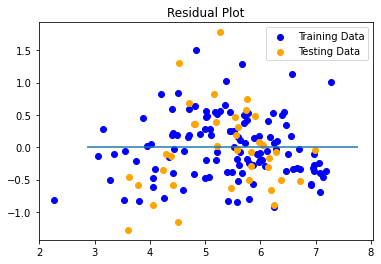

In [20]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(1, figsize=(5, 5))
# axes = Axes3D(fig, elev=20, azim=45)
# axes.scatter(X[:,0], X[:,1], X[:,2], X[:,3], X[:,4], X[:,5], c=y, cmap=plt.cm.get_cmap("Spectral"))
# plt.show()

In [15]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.72904747 1.27985467 1.0172546  1.43639826 0.20354353 1.15819502]]
y-axis intercept:  [1.72191043]


In [22]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3942249448445839, R2: 0.6046097118187415


In [24]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3932644240444793, R2: 0.6055730719534158


In [25]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3936593690649959, R2: 0.6051769594609926
